In [212]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Import Dataset 

In [213]:
df= pd.read_csv('data_balita.csv')

In [214]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [216]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [217]:
df['Jenis Kelamin'].unique()

array(['laki-laki', 'perempuan'], dtype=object)

In [218]:
df['Status Gizi'].unique()

array(['stunted', 'tinggi', 'normal', 'severely stunted'], dtype=object)

In [219]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [220]:
df.duplicated().sum()

81574

In [221]:
df.isna().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

## Exploratory Data Analysis

In [222]:
df.columns

Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')

In [223]:
df = df.rename(columns = {'Umur (bulan)' : 'age(month)',
                     'Jenis Kelamin' : 'sex',
                     'Tinggi Badan (cm)' : 'height(cm)',
                    'Status Gizi' : 'status'})

In [224]:
df.nunique()

age(month)      61
sex              2
height(cm)    6800
status           4
dtype: int64

In [225]:
df['sex'] = df['sex'].replace({'laki-laki' : 'male' ,
                  'perempuan' : 'female'})

In [226]:
df['status'] = df['status'].replace({
    'tinggi' : 'tall',
})

### How many people according to gender are normal?

In [230]:
df_stunted_normal = df.groupby(['status','sex']).count().reset_index()

In [256]:
df_normal_sex = df_stunted_normal[df_stunted_normal['status'] == 'normal'].reset_index()
df_normal_sex = df_normal_sex.drop(columns='age(month)',axis=1)
df_normal_sex.rename(columns={'height(cm)':'total'},inplace=True)
df_normal_sex = df_normal_sex.drop(columns='index',axis=1)

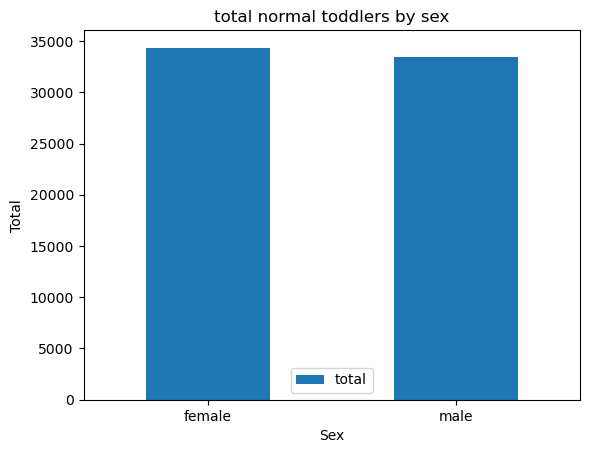

In [255]:
ax = df_normal_sex.plot(kind='bar' , title='total normal toddlers by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Total')
plt.xticks([0,1],['female','male'])
ax.set_xticklabels(['female','male'],rotation=0)
plt.show()

### How many people based on gender are stunted ?

In [257]:
df_stunted_sex = df_stunted_normal[df_stunted_normal['status'] == 'stunted']
df_stunted_sex=df_stunted_sex.drop(columns='height(cm)')
df_stunted_sex.rename(columns={'age(month)':'total'},inplace=True)
df_stunted_sex=df_stunted_sex.reset_index()
df_stunted_sex=df_stunted_sex.drop(columns='index')

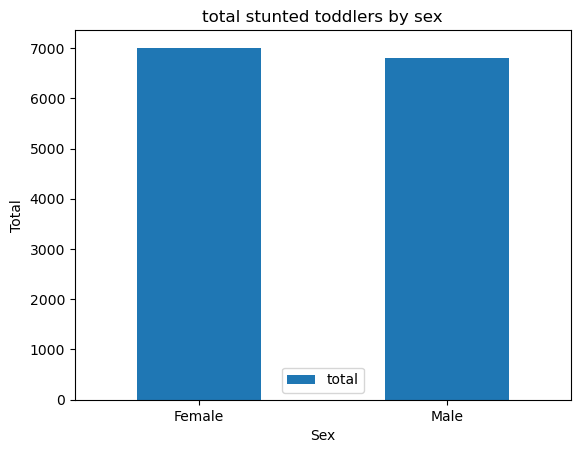

In [285]:
ax = df_stunted_sex.plot(kind='bar',title='total stunted toddlers by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Total')
plt.xticks([0,1],['Female','Male'])
ax.set_xticklabels(['Female','Male'],rotation=0)
plt.show()

### how many people based on calorie status ?

In [305]:
df_status = df['status'].groupby(df['status']).count().to_frame()

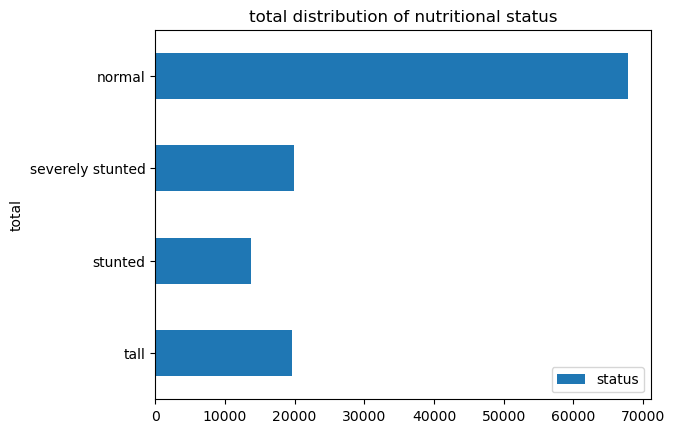

In [323]:
ax = df_status.plot(kind='barh',title='total distribution of nutritional status')
ax.set_ylabel('total')
plt.gca().invert_yaxis()
plt.show()

### what is the average height for calorie status ?

In [406]:
df_mean_height = df.groupby('status')['height(cm)'].mean().reset_index()

In [424]:
df_mean_height

,status,height(cm)
0,normal,92.702689
1,severely stunted,73.176224
2,stunted,82.208722
3,tall,94.912898


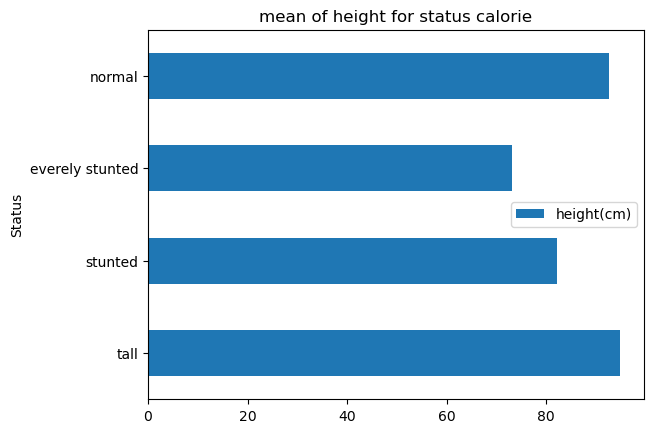

In [423]:
ax = df_mean_height.plot(kind='barh',title='mean of height for status calorie')
ax.set_ylabel('Status')
plt.yticks([0,1,2,3],['normal','everely stunted','stunted','tall'])
plt.gca().invert_yaxis()
plt.show()